In [0]:
# data analysis and manipulation
import pandas as pd
import numpy as np# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')# data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [0]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [0]:
print('El total de valores nulos en el dataframe es:', df.isna().sum().sum())

El total de valores nulos en el dataframe es: 19


In [0]:
print('Columnas con valores nulos:')
print(df.isna().sum())

Columnas con valores nulos:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Out[11]: <seaborn.axisgrid.PairGrid at 0x7f9942ff1c40>

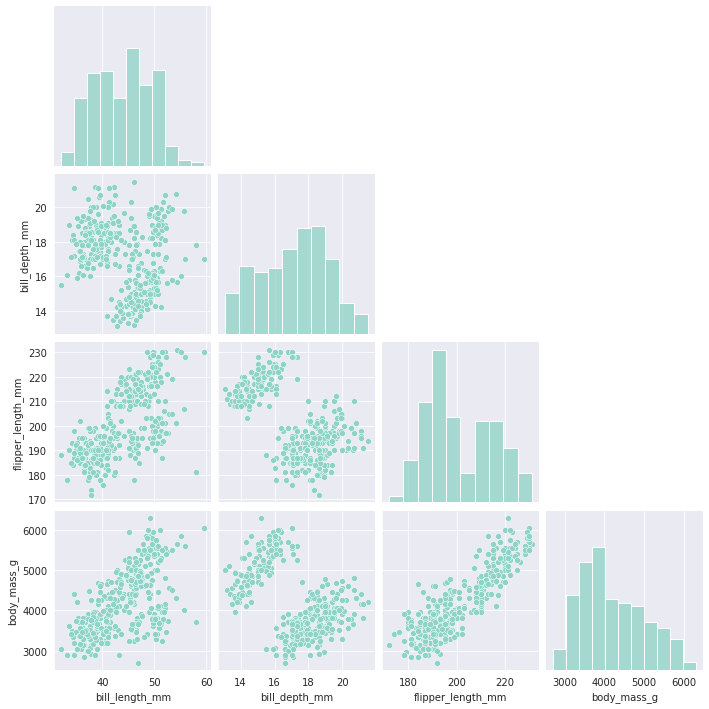

In [0]:
sns.set_palette("Set3")
sns.pairplot(df, corner=True)

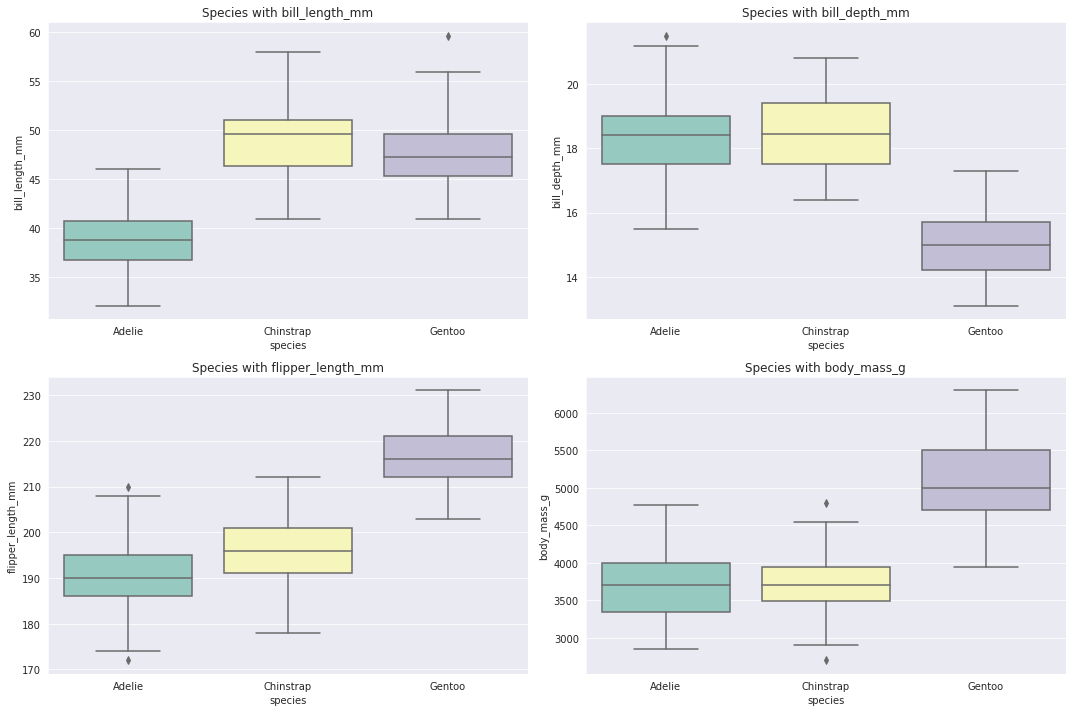

In [0]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(data=df, x='species', y='bill_length_mm', ax=ax[0,0]).set_title('Species with bill_length_mm')
sns.boxplot(data=df, x='species', y='bill_depth_mm', ax=ax[0,1]).set_title('Species with bill_depth_mm')
sns.boxplot(data=df, x='species', y='flipper_length_mm', ax=ax[1,0]).set_title('Species with flipper_length_mm')
sns.boxplot(data=df, x='species', y='body_mass_g', ax=ax[1,1]).set_title('Species with body_mass_g')
plt.tight_layout()

In [0]:
def show_annot(plot):
   for p in plot.patches:
       plot.annotate(
          format(p.get_height()),
          (p.get_x() + p.get_width() / 2., p.get_height()),
          ha='center',
          va='center',
          xytext=(0,10),
          textcoords='offset points'
       )

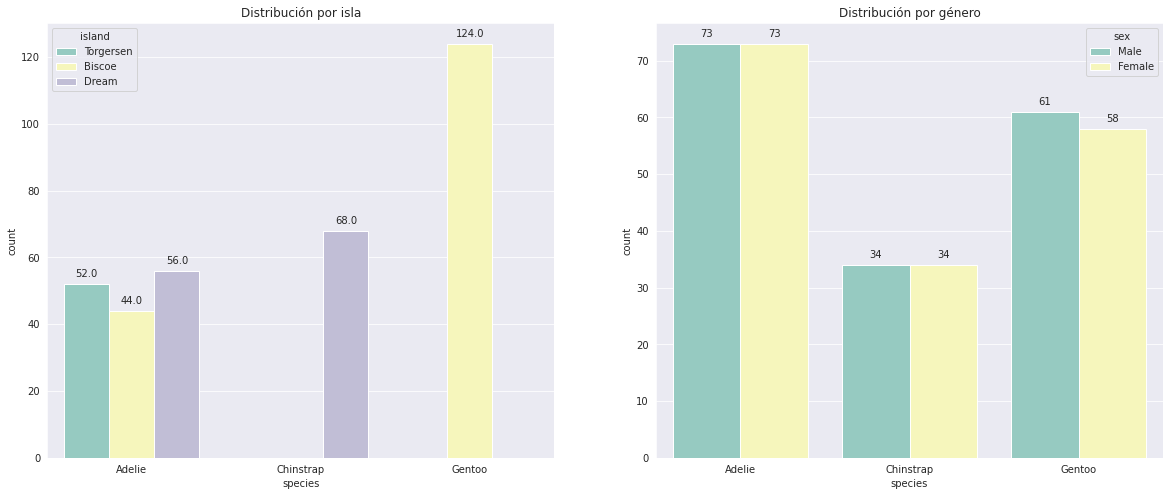

In [0]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
island_plot = sns.countplot(x='species', hue='island', data=df, ax=ax[0])
sex_plot = sns.countplot(x='species', hue='sex', data=df, ax=ax[1])
show_annot(island_plot)
show_annot(sex_plot)
ax[0].title.set_text("Distribución por isla")
ax[1].title.set_text("Distribución por género")

Out[19]: <seaborn.axisgrid.FacetGrid at 0x7f99400ea550>

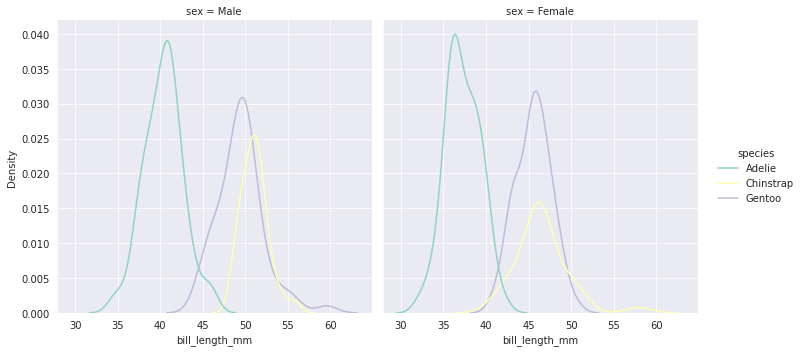

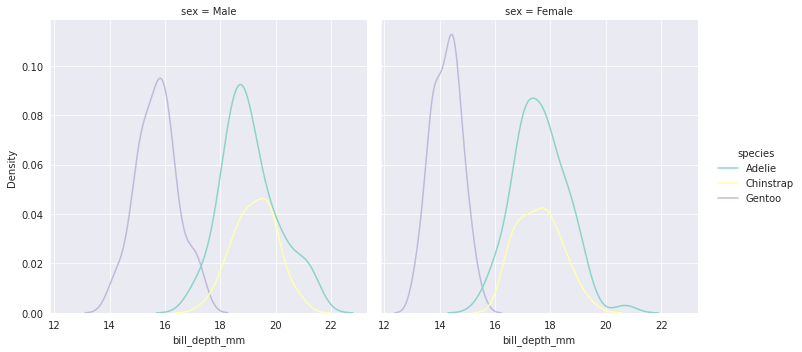

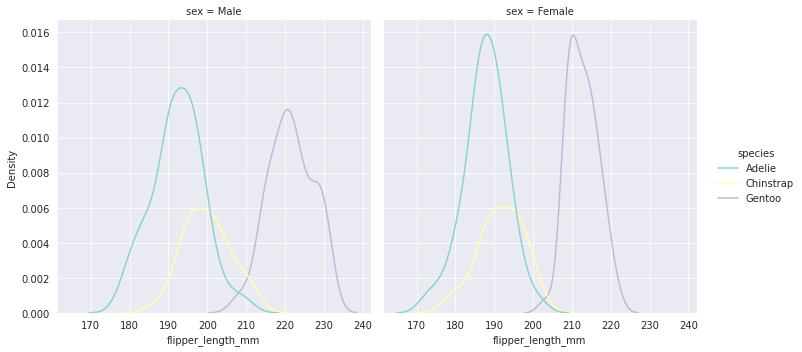

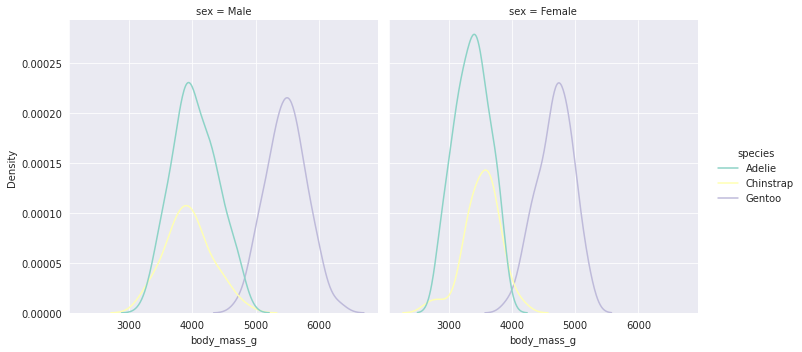

In [0]:
numerical_col = [col for col in df.columns if df[col].dtypes == np.float64]
categorical_col = [col for col in df.columns if df[col].dtypes == object]
sns.displot(data=df, x=numerical_col[0], kind='kde', hue='species', col='sex')
sns.displot(data=df, x=numerical_col[1], kind='kde', hue='species', col='sex')
sns.displot(data=df, x=numerical_col[2], kind='kde', hue='species', col='sex')
sns.displot(data=df, x=numerical_col[3], kind='kde', hue='species', col='sex')

Out[20]: <seaborn.axisgrid.FacetGrid at 0x7f993fba9be0>

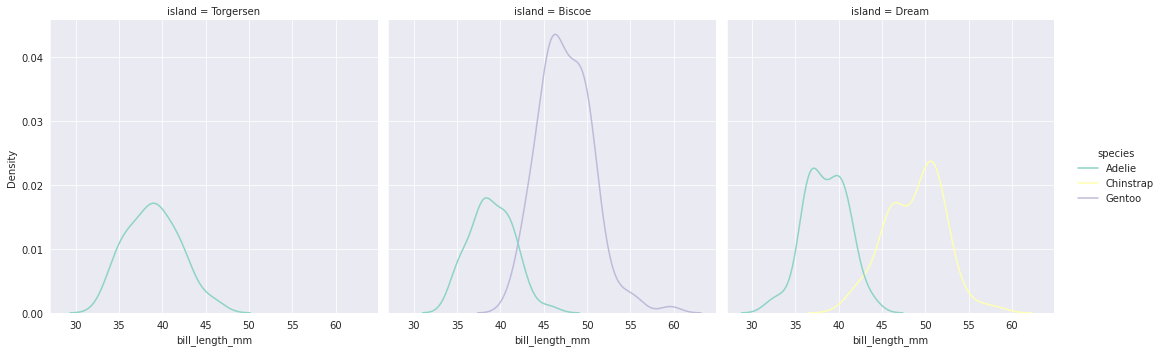

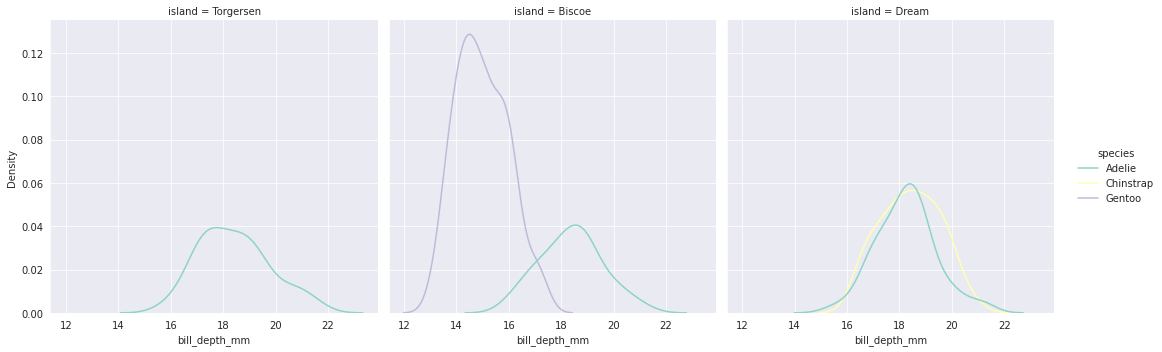

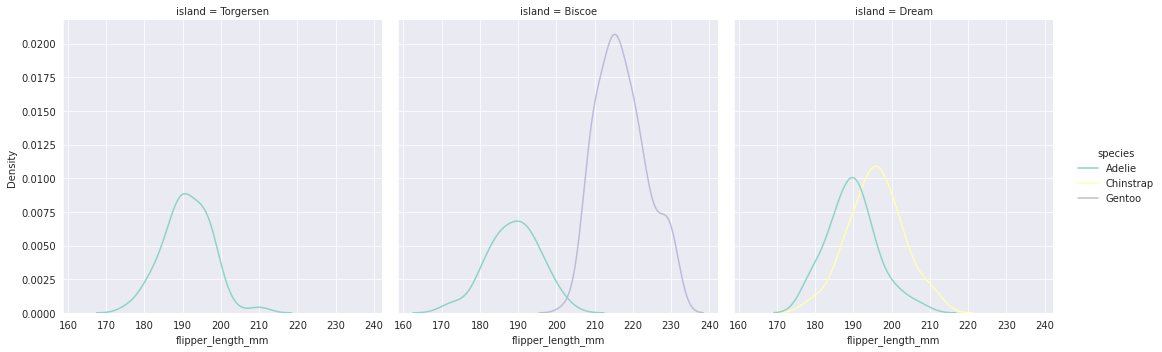

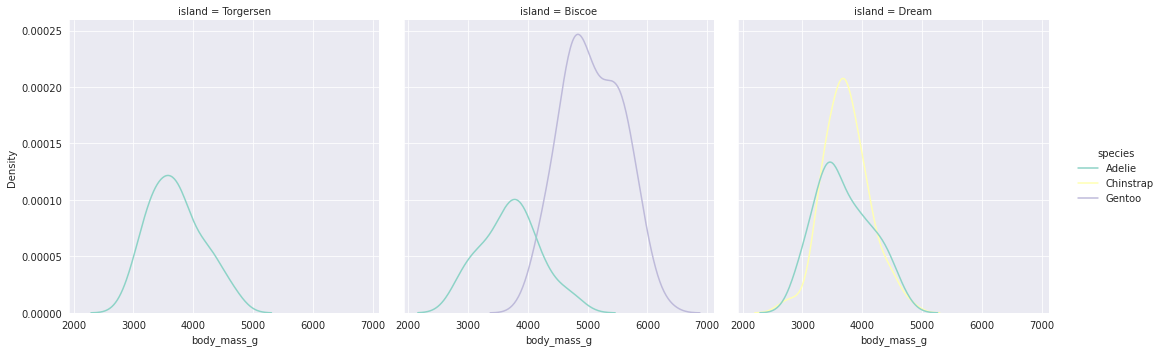

In [0]:
sns.displot(data=df, x=numerical_col[0], kind='kde', hue='species', col='island')
sns.displot(data=df, x=numerical_col[1], kind='kde', hue='species', col='island')
sns.displot(data=df, x=numerical_col[2], kind='kde', hue='species', col='island')
sns.displot(data=df, x=numerical_col[3], kind='kde', hue='species', col='island')

In [0]:
X = df.drop(['species'], axis=1)
y = df['species']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
print('Total X_train', len(X_train))
print('Total X_test', len(X_test))
print('Ttal y_train', len(y_train))
print('Total y_test', len(y_test))

Total X_train 275
Total X_test 69
Ttal y_train 275
Total y_test 69


In [0]:
numerical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer()),
   ('normalization', MinMaxScaler())
])

In [0]:
categorical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='most_frequent')),
   ('ordinal', OrdinalEncoder())
])

In [0]:
categorical_with_missing = [col for col in df.columns if df[col].isna().any() and df[col].dtypes == object]
numerical_with_missing = [col for col in df.columns if df[col].isna().any() and df[col].dtypes == np.float64]
preprocessor = ColumnTransformer(
   transformers=[
      ('num', numerical_transformer, numerical_with_missing),
      ('cat', categorical_transformer, categorical_with_missing)
   ]
)

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)

In [0]:
my_pipeline = Pipeline(steps=[
   ('preprocessor', preprocessor),
   ('knn', knn)
])
my_pipeline.fit(X_train, y_train)

Out[30]: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('normalization',
                                                                   MinMaxScaler())]),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                               

In [0]:
yhat = my_pipeline.predict(X_test)
accuracy = my_pipeline.score(X_test, y_test)
print('La efectividad para el modelo de KNN es:', str(accuracy * 100) + '%')

La efectividad para el modelo de KNN es: 100.0%


Out[32]: <AxesSubplot:>

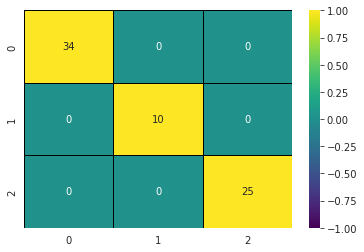

In [0]:
cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, vmin=-1, vmax=1, annot=True, cmap='viridis', linewidth=1, linecolor='black')